## Characterisation of whole genome sequence data from South African Neisseria gonorrhoeae isolates
This notebook will be a documentation of data explored and figures generated for my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa. These are my main objectives:

1) Characterisation of genomes
2) Identification of anti-microbial resistance determinants
3) Comparison of genomes

While I will analyse my South African dataset alone, I will also analyse it in conjunction with (i) other available South African isolate data, (ii) data for isolates across the continent of Africa and (iii) data for isolates across the globe. These additional data will be acquired through the online database PubMLST.

### MLST and NG-STAR

In [31]:
#pip install pandas
import pandas as pd


    # Importing MLST data for my South African isolates
my_mlst: pd.DataFrame = pd.read_csv("Data/mydata_mlst.csv", sep = ",", header = "infer")
#my_mlst.head()

    # Making ST a categorical variable
my_mlst.ST = my_mlst.ST.astype(str)
#my_mlst.shape


    # ...same process for NG-STAR ST data
my_ngstar: pd.DataFrame = pd.read_csv("Data/mydata_ngstar.csv", sep = ",", header = "infer")
#my_ngstar.head()

my_ngstar.ST = my_ngstar.ST.astype(str)
#my_ngstar.shape

Here, I have imported datasets containing MLST and NGSTAR ST information for my South African isolates.

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_34041/4048491972.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_34041/4048491972.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)


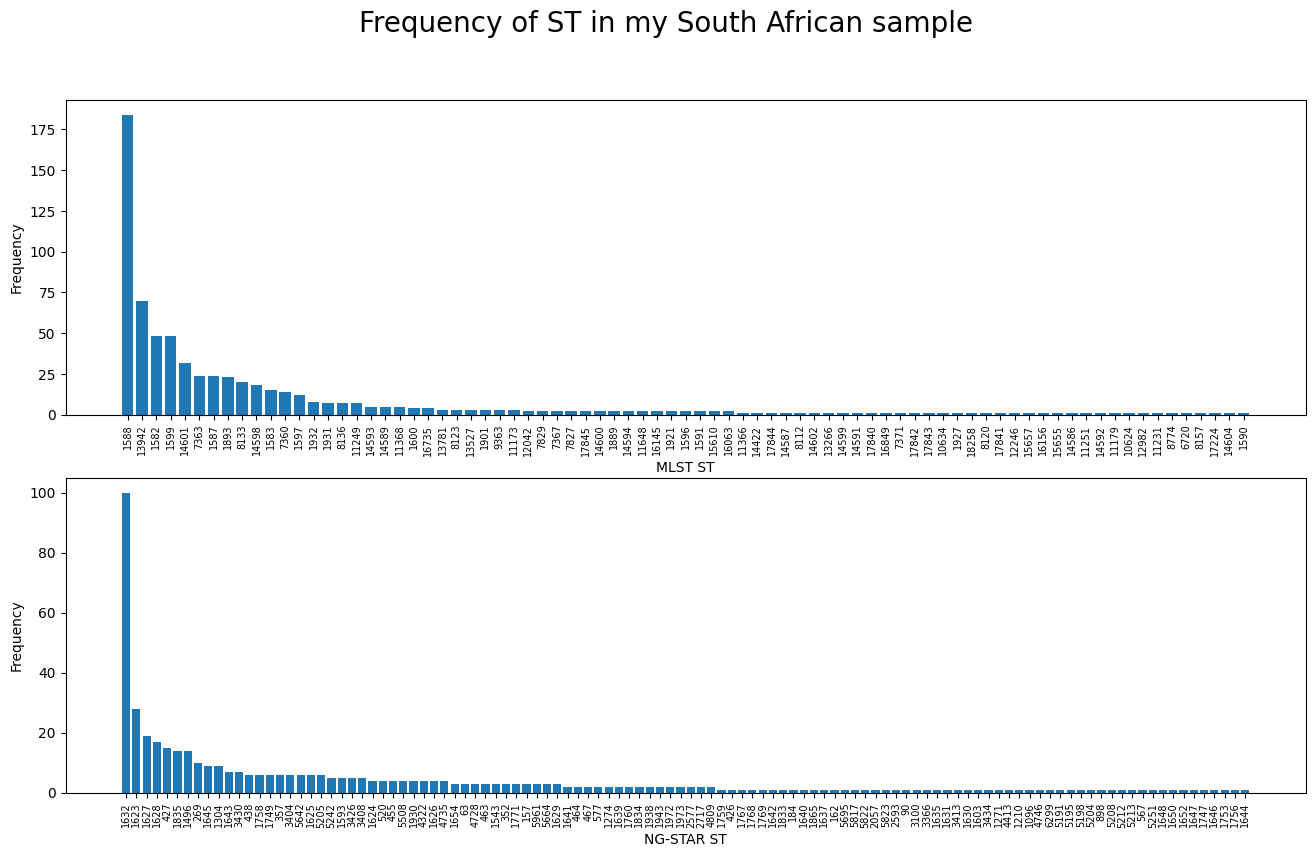

In [32]:
#!pip install matplotlib
from matplotlib import pyplot as plt

    # Creating a figure with 2 subplots
fig, ax = plt.subplots(2,1, figsize = (16,9))

    # Creating a bar graph to represent MLST frequencies of my South African sample
ax[0].bar(x = my_mlst.ST, height = my_mlst.Frequency)

    # Changing/adding labels
ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

    # ...same process for NG-STAR ST frequencies of my South African sample
ax[1].bar(x = my_ngstar.ST, height = my_ngstar.Frequency)

ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

    # Adding a title to the figure
fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

    # Showing the figure
plt.show()


I have created a figure with two subplots, each showing a bar graph that represents the frequency of MLST and NG-STAR STs, respectively, in my South African dataset.

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_34041/3591347215.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_34041/3591347215.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)


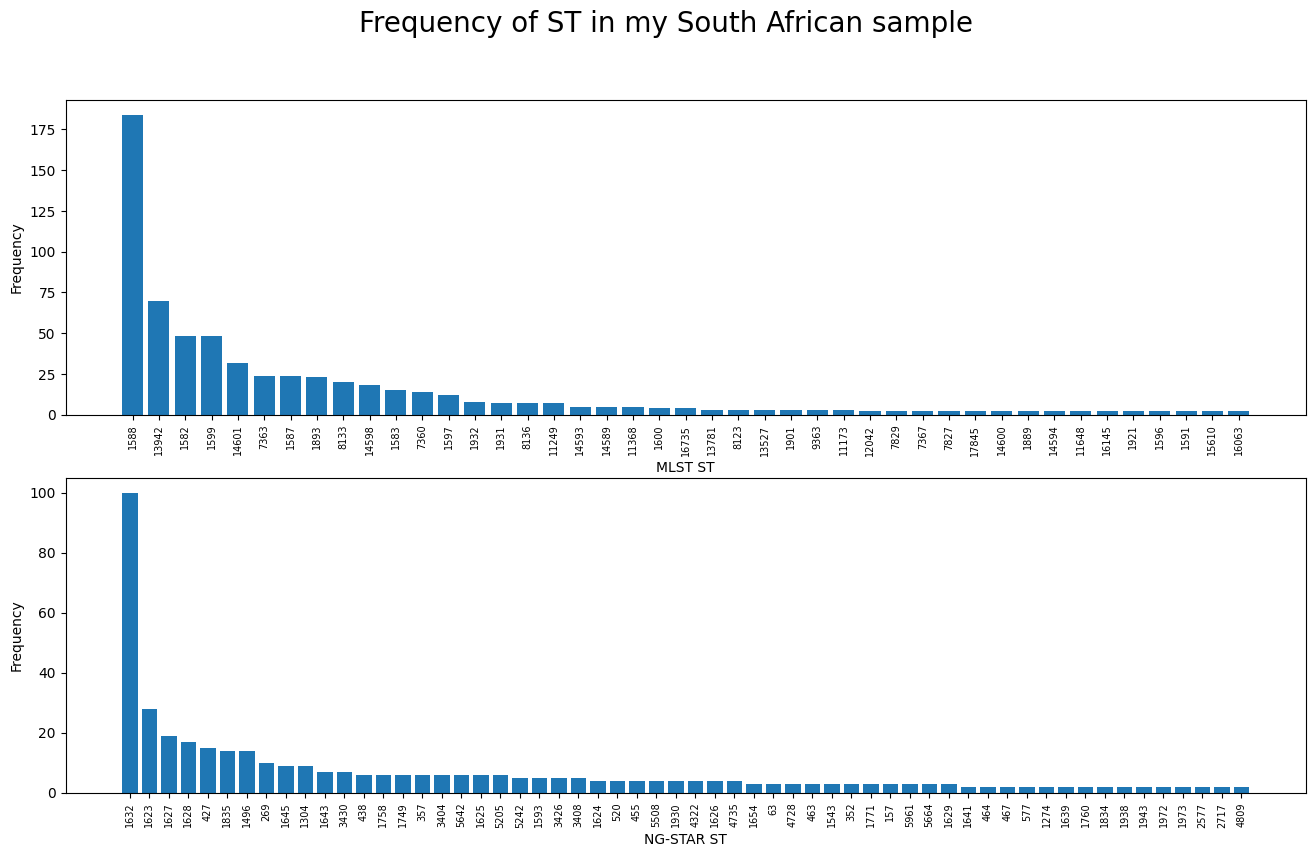

In [33]:
    # Removing rows/bars that represent MLSTs with a frequency of 1
my_mlst2: pd.DataFrame =  my_mlst[my_mlst.Frequency != 1]

    # ...same for NG-STAR STs
my_ngstar2: pd.DataFrame = my_ngstar[my_ngstar.Frequency != 1]

    # Re-doing the figure with the newly-pruned DataFrames
fig, ax = plt.subplots(2,1, figsize = (16,9))

ax[0].bar(x = my_mlst2.ST, height = my_mlst2.Frequency)

ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

ax[1].bar(x = my_ngstar2.ST, height = my_ngstar2.Frequency)

ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

plt.show()


Because the previous bar graphs were difficult to discern, I created a subset of the DataFrames that excludes STs with a frequency of 1. This enables a clearer set of bar graphs to be constructed, whereby the most common STs can be identified more easily.

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_34041/301670560.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(sa_mlst2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_34041/301670560.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(sa_ngstar2.ST, rotation = 90, fontsize = 7)


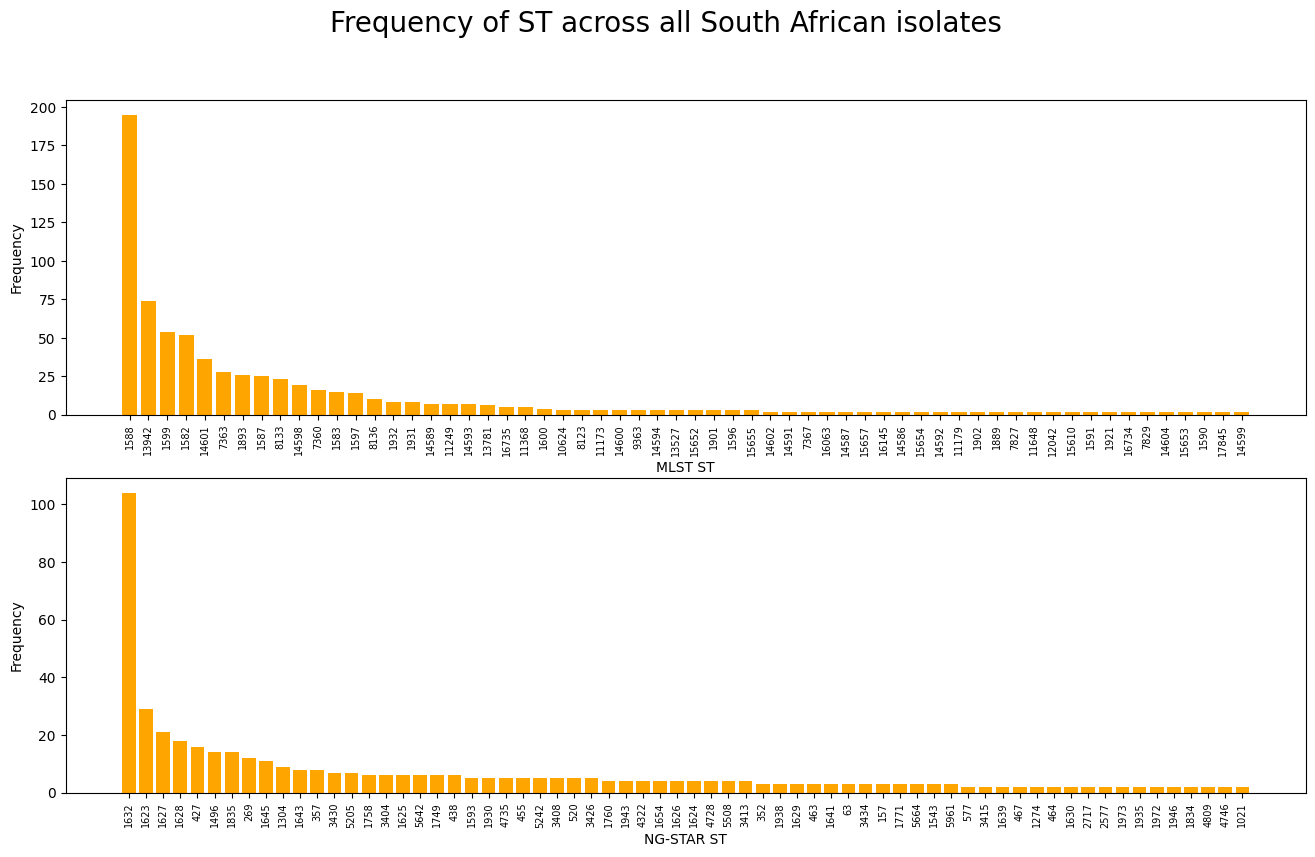

In [34]:
    # Doing the same process with data from across the whole of South Africa, including my data.

    # importing...
sa_mlst: pd.DataFrame = pd.read_csv("Data/sa_mlst.csv", sep = ",", header = "infer")
#sa_mlst.head()

    # converting variable type...
sa_mlst.ST = sa_mlst.ST.astype(str)
#sa_mlst.shape

    # removing low-frequency MLSTs...
sa_mlst2 = sa_mlst[sa_mlst.Frequency != 1]

    
    # Same process for NG-STAR STs...
sa_ngstar: pd.DataFrame = pd.read_csv("Data/sa_ngstar.csv", sep = ",", header = "infer")
#sa_ngstar.head()

sa_ngstar.ST = sa_ngstar.ST.astype(str)
#sa_ngstar.shape

sa_ngstar2 = sa_ngstar[sa_ngstar.Frequency != 1]


    # Plotting the figure...
fig, ax = plt.subplots(2,1, figsize = (16,9))

ax[0].bar(x = sa_mlst2.ST, height = sa_mlst2.Frequency, color = "orange")

ax[0].set_xticklabels(sa_mlst2.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

ax[1].bar(x = sa_ngstar2.ST, height = sa_ngstar2.Frequency, color = "orange")

ax[1].set_xticklabels(sa_ngstar2.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

fig.suptitle("Frequency of ST across all South African isolates", fontsize = 20)

plt.show()

These bar graphs represent the same type of information as the above graphs, but for all South African isolates available on PubMLST.

In [35]:
    # re-ordering my South African MLST dataframe
my_top_mlst: pd.DataFrame = my_mlst.sort_values("Frequency", ascending = False)
#my_top_mlst.shape
my_top_mlst.head()

,ST,Frequency,Percentage
0,1588,184,27.54
1,13942,70,10.48
2,1582,48,7.19
3,1599,48,7.19
4,14601,32,4.79


In [36]:
    # re-ordering "all of South Africa" MLST dataframe
sa_top_mlst: pd.DataFrame = sa_mlst.sort_values("Frequency", ascending = False)
#sa_top_mlst.shape
sa_top_mlst.head()

,ST,Frequency,Percentage
0,1588,195,25.52
1,13942,74,9.69
2,1599,54,7.07
3,1582,52,6.81
4,14601,36,4.71


Here, I have simply ordered the MLST ST DataFrames in descending order, by Frequency. These show the top 5 most frequent MLST STs across both my South African isolates and all South African isolates.

In [37]:
    # re-ordering my South African NG-STAR ST dataframe
my_top_ngstar: pd.DataFrame = my_ngstar.sort_values("Frequency", ascending=False)
#my_top_ngstar.shape
my_top_ngstar.head()

,ST,Frequency,Percentage
0,1632,100,21.55
1,1623,28,6.03
2,1627,19,4.09
3,1628,17,3.66
4,427,15,3.23


In [38]:
    # re-ordering the "all South African" NG-STAR ST dataframe
sa_top_ngstar: pd.DataFrame = sa_ngstar.sort_values("Frequency", ascending=False)
#sa_top_ngstar.shape
sa_top_ngstar.head()

,ST,Frequency,Percentage
0,1632,104,19.62
1,1623,29,5.47
2,1627,21,3.96
3,1628,18,3.40
4,427,16,3.02


These are ordered versions of the NG-STAR ST DataFrames.

### cgMLST

In [39]:
    # conducting the same operations using cgMLST data for my South African sample
    
    # importing...
my_cgmlst: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst.csv", sep = ",", header = "infer")
#my_cgmlst.head()

    # converting variable type...
my_cgmlst.cgST = my_cgmlst.cgST.astype(str)

my_cgmlst.head()

,cgST,Frequency,Percentage
0,21989,2,0.28
1,19489,2,0.28
2,34507,2,0.28
3,27605,2,0.28
4,34509,2,0.28


Here, I have imported a dataset containing cgMLST ST information for my South African isolates.

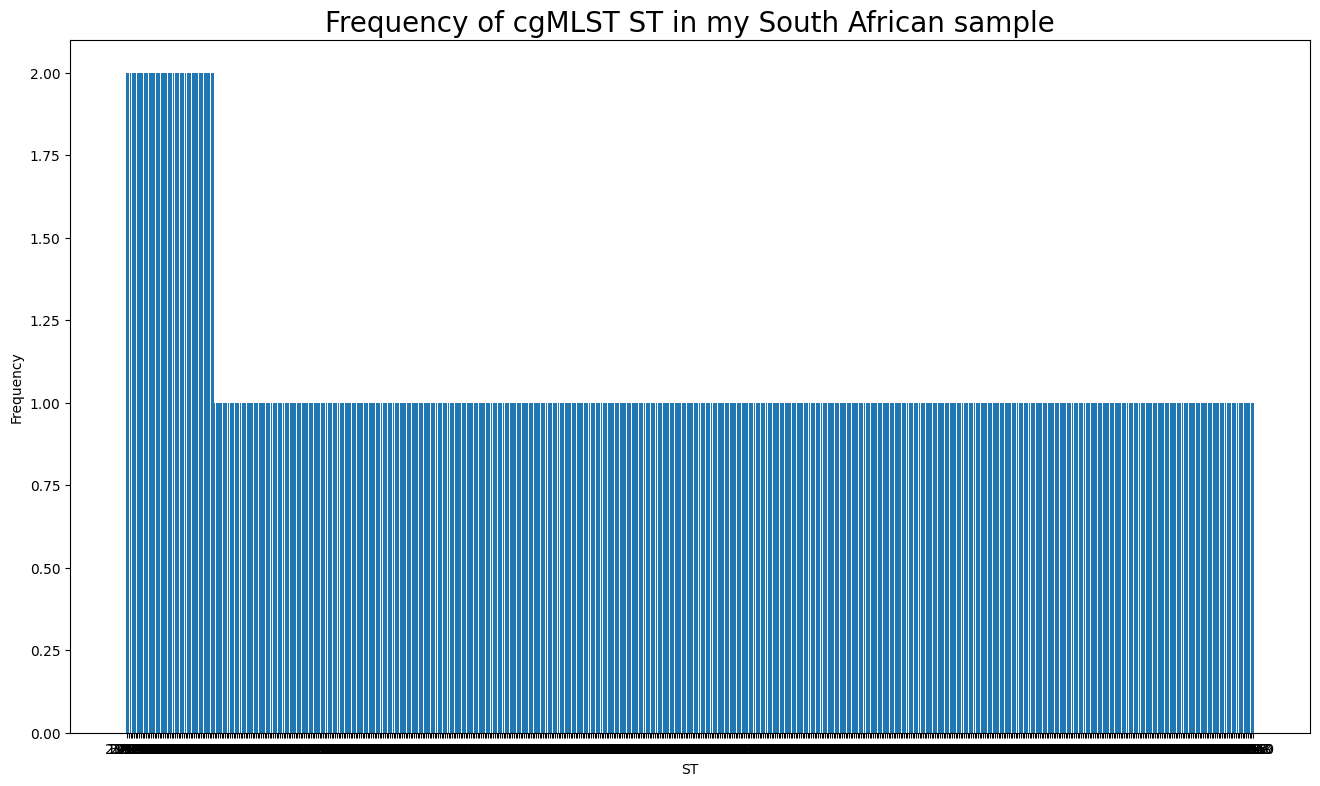

In [40]:
    # creating a figure...
fig = plt.figure(figsize = (16,9))

plt.bar(x = my_cgmlst.cgST, height = my_cgmlst.Frequency)

plt.title("Frequency of cgMLST ST in my South African sample", fontsize = 20)
plt.xlabel("ST")
plt.ylabel("Frequency")

plt.show()

Here, I have created a figure with a single bar graph. This displays the frequency of all cgMLST STs identified in my South African dataset. 

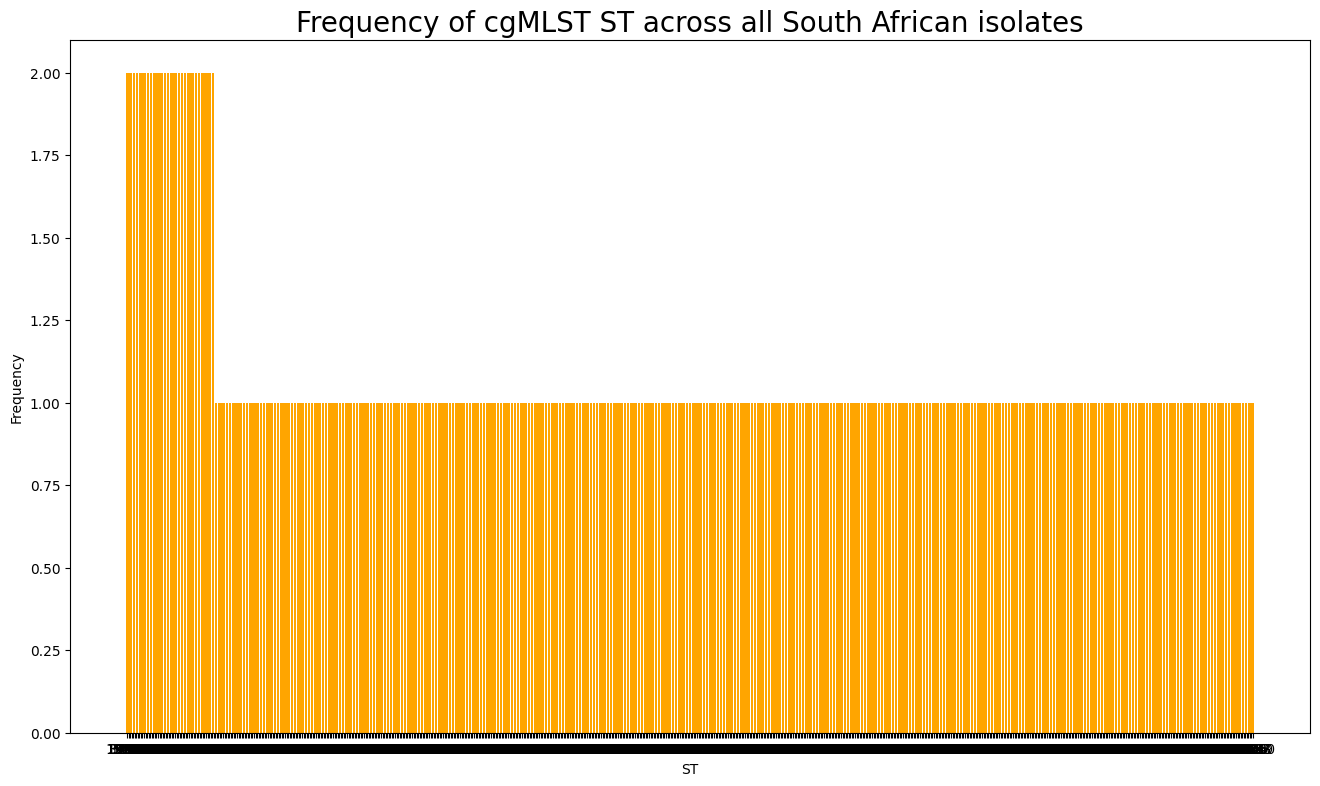

In [41]:
    # the same operations for cgMLST data from across the whole of South Africa, including my data

    # importing...
sa_cgmlst: pd.DataFrame = pd.read_csv("Data/sa_cgmlst.csv", sep = ",", header = "infer")
#sa_cgmlst.head()

    # changing variable type...
sa_cgmlst.cgST = sa_cgmlst.cgST.astype(str)

    # creating a figure...
fig = plt.figure(figsize = (16,9))

plt.bar(x = sa_cgmlst.cgST, height = sa_cgmlst.Frequency, color = "orange")

plt.title("Frequency of cgMLST ST across all South African isolates", fontsize = 20)
plt.xlabel("ST")
plt.ylabel("Frequency")

plt.show()

This figure represents the same type of information as the above bar graph, but reflects all South African isolates available on PubMLST.

In [42]:
    # ordering my South African cgMLST ST dataframe
my_top_cgmlst: pd.DataFrame = my_cgmlst.sort_values("Frequency", ascending = False)
#my_top_cgmlst.head(n = 10)
#my_top_cgmlst.shape

In [43]:
    # ordering the "all South Africa" cgMLST ST dataframe
sa_top_cgmlst: pd.DataFrame = sa_cgmlst.sort_values("Frequency", ascending = False)
#sa_top_cgmlst.head(n = 10)
#sa_top_cgmlst.shape

Here, I have simply ordered both cgMLST ST datasets in descending order, by Frequency. However, as there is a large variety of STs and the frequency of STs only ranges from 1-2, this isn't informative.

### Phenotypic AMR data

In [137]:
    # importing phenotypic AMR data for my South African isolates
my_amr: pd.DataFrame = pd.read_csv("Data/mydata_amr_prof.csv", sep = ",", header = "infer")
#my_amr.head()

    # renaming columns...
my_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#my_amr.head()


    # separating out the data for each antimicrobial, while removing rows with missing data
    # azithromycin
my_azi = my_amr.azi_sign.dropna(axis = 0, how = "any")
    # cefixime
my_cef = my_amr.cef_sir.dropna(axis = 0, how = "any")
    # ceftriaxone
my_ceftri = my_amr.ceftri_sir.dropna(axis = 0, how = "any")
    # ciprofloxacin
my_cipro = my_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting the frequency of S/I/R or </=/> for each antimicrobial
    # azithromycin
amr_azi = my_azi.groupby(my_azi).count()
#print(amr_azi)

    # cefixime
amr_cef = my_cef.groupby(my_cef).count()
#print(amr_cef)

    # ceftriaxone
amr_ceftri = my_ceftri.groupby(my_ceftri).count()
#print(amr_ceftri)

    # ciprofloxacin
amr_cipro = my_cipro.groupby(my_cipro).count()
#print(amr_cipro)


0      =
4      =
5      =
6      =
7      =
      ..
336    =
337    =
338    =
339    >
340    =
Name: azi_sign, Length: 218, dtype: object

Here I have imported a dataset containing phenotypic AMR data for my South African isolates. I conducted some operations on this dataset:

1) Created individual DataFrames for each antimicrobial.
2) Created a series for each antimicrobial that summarises the number of records of S, I and R (Or <, = and > for MIC sign recordings) in their respective DataFrame.

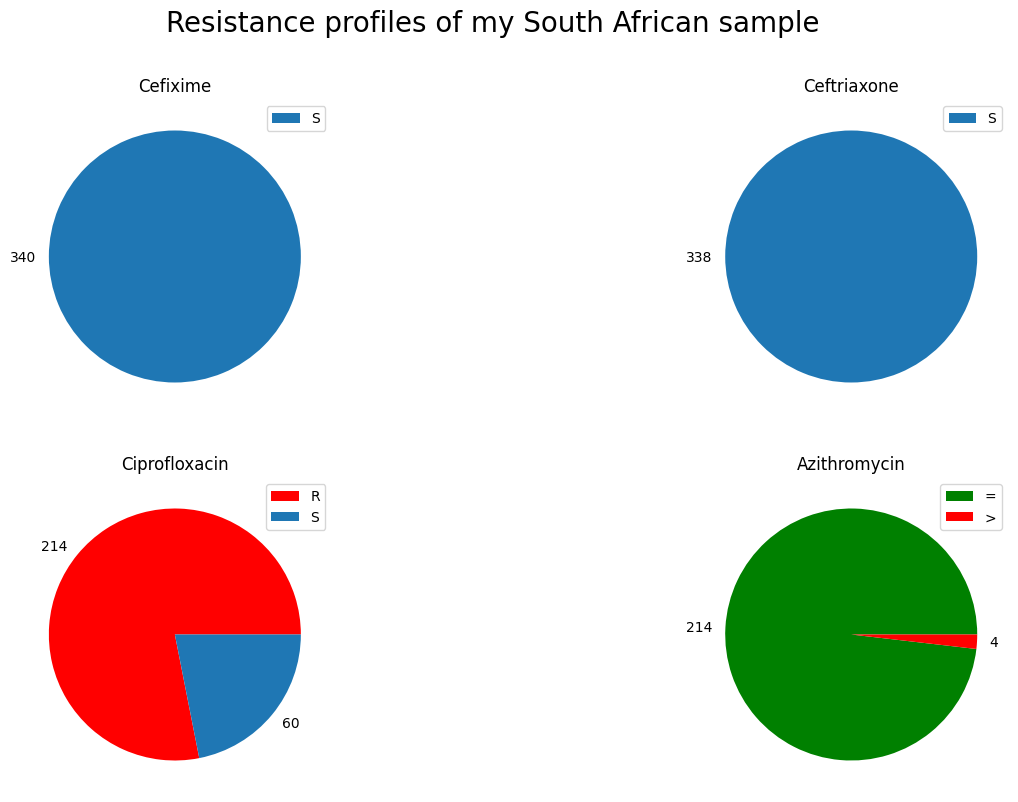

In [45]:
    # Creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # making a pie chart showing the results of phenotypic AMR tests to cefixime
ax[0,0].pie(amr_cef, labels = amr_cef)
ax[0,0].set_title("Cefixime")
    # adds a legend
ax[0,0].legend(amr_cef.keys().tolist(), loc = "upper right")

    # ...same for ceftriaxone
ax[0,1].pie(amr_ceftri, labels = amr_ceftri)
ax[0,1].set_title("Ceftriaxone")
ax[0,1].legend(amr_ceftri.keys().tolist(), loc = "upper right")

    # ...same for ciprofloxacin
ax[1,0].pie(amr_cipro, labels = amr_cipro, colors = ["red", "#1f77b4"])
ax[1,0].set_title("Ciprofloxacin")
ax[1,0].legend(amr_cipro.keys().tolist(), loc = "upper right")

    # ...same for azithromycin
ax[1,1].pie(amr_azi, labels = amr_azi, colors = ["green", "red"])
ax[1,1].set_title("Azithromycin")
ax[1,1].legend(amr_azi.keys().tolist(), loc = "upper right")

    # adding a title to the figure
fig.suptitle("Resistance profiles of my South African sample", fontsize = 20)

plt.show()

Here I have created a figure with 4 subplots. Each pie chart corresponds to a different antimicrobial and shows the frequency of isolates in the my South African isolates dataset at each level of antimicrobial resistance.

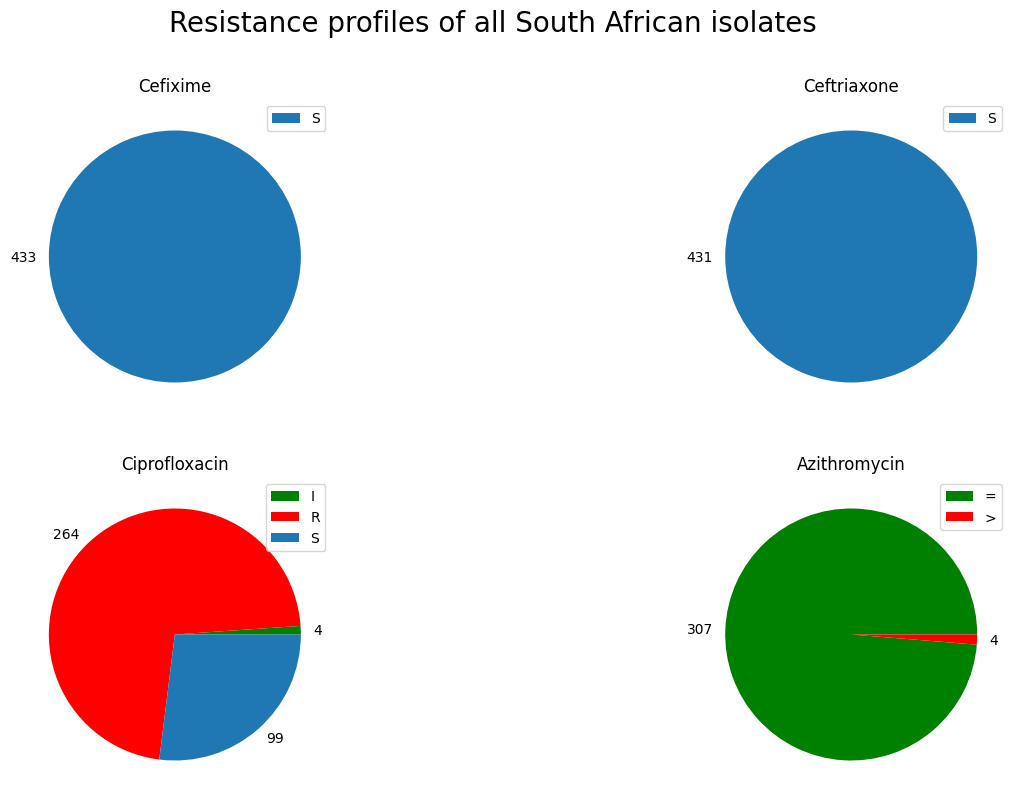

In [46]:
    # Same set of operations for phenotypic AMR data for the whole of South Africa, including my data
    
    # importing...
sa_amr: pd.DataFrame = pd.read_csv("Data/sa_amr_prof.csv", sep = ",", header = "infer")
#sa_amr.head()

    # renaming columns...
sa_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#sa_amr.head()

    # separating data by antimicrobial...
sa_azi = sa_amr.azi_sign.dropna(axis = 0, how = "any")
sa_cef = sa_amr.cef_sir.dropna(axis = 0, how = "any")
sa_ceftri = sa_amr.ceftri_sir.dropna(axis = 0, how = "any")
sa_cipro = sa_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi2 = sa_azi.groupby(sa_azi).count()
#print(amr_azi2)

amr_cef2 = sa_cef.groupby(sa_cef).count()
#print(amr_cef2)

amr_ceftri2 = sa_ceftri.groupby(sa_ceftri).count()
#print(amr_ceftri2)

amr_cipro2 = sa_cipro.groupby(sa_cipro).count()
#print(amr_cipro2)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

ax[0,0].pie(amr_cef2, labels = amr_cef2)
ax[0,0].set_title("Cefixime")
ax[0,0].legend(amr_cef2.keys().tolist(), loc = "upper right")

ax[0,1].pie(amr_ceftri2, labels = amr_ceftri2)
ax[0,1].set_title("Ceftriaxone")
ax[0,1].legend(amr_ceftri2.keys().tolist(), loc = "upper right")

ax[1,0].pie(amr_cipro2, labels = amr_cipro2,  colors = ["green", "red", "#1f77b4"])
ax[1,0].set_title("Ciprofloxacin")
ax[1,0].legend(amr_cipro2.keys().tolist(), loc = "upper right")

ax[1,1].pie(amr_azi2, labels = amr_azi2, colors = ["green", "red"])
ax[1,1].set_title("Azithromycin")
ax[1,1].legend(amr_azi2.keys().tolist(), loc = "upper right")

fig.suptitle("Resistance profiles of all South African isolates", fontsize = 20)

plt.show()


This figure depicts the same type of information as the above figure, however represents *all* South African isolates available on PubMLST.

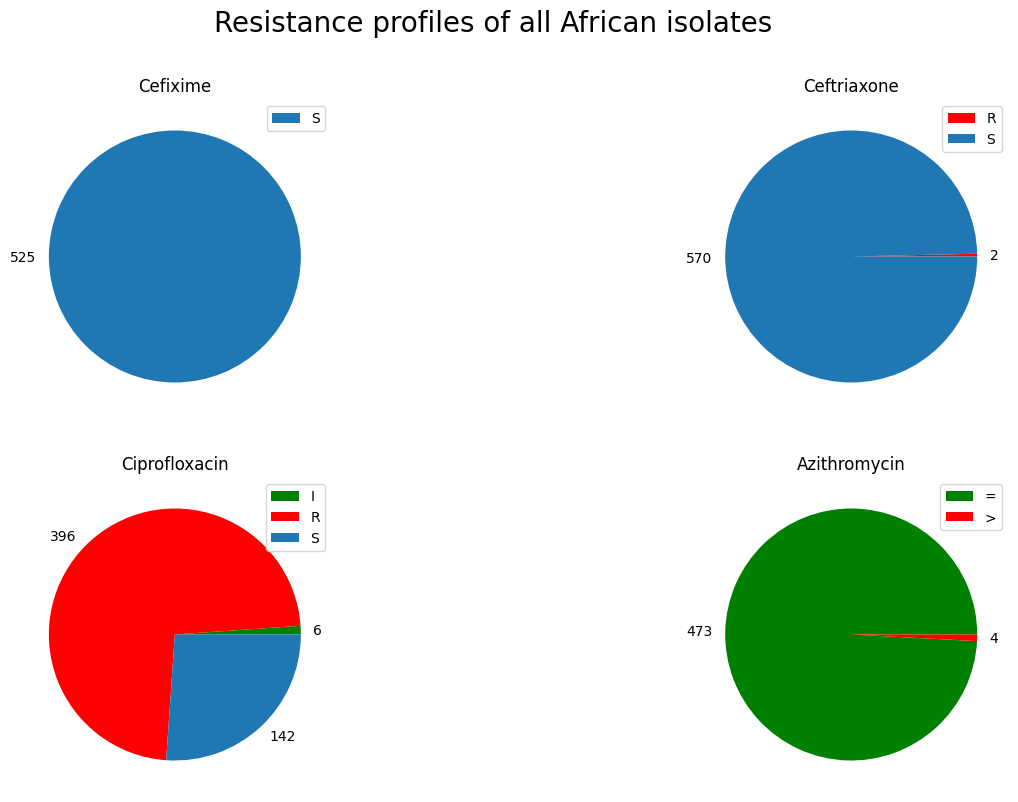

In [47]:
    # same process for phenotypic AMR data from across the continent of Africa, including my data
    
    # importing...
afr_amr: pd.DataFrame = pd.read_csv("Data/afr_amr_prof.csv", sep = ",", header = "infer")
#afr_amr.head()

    # renaming columns...
afr_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#afr_amr.head()


    # separating data my antimicrobial...
afr_azi = afr_amr.azi_sign.dropna(axis = 0, how = "any")
afr_cef = afr_amr.cef_sir.dropna(axis = 0, how = "any")
afr_ceftri = afr_amr.ceftri_sir.dropna(axis = 0, how = "any")
afr_cipro = afr_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi3 = afr_azi.groupby(afr_azi).count()
#print(amr_azi3)

amr_cef3 = afr_cef.groupby(afr_cef).count()
#print(amr_cef3)

amr_ceftri3 = afr_ceftri.groupby(afr_ceftri).count()
#print(amr_ceftri3)

amr_cipro3 = afr_cipro.groupby(afr_cipro).count()
#print(amr_cipro3)


    # creating a figure... 
fig, ax = plt.subplots(2,2, figsize = (16,9))

ax[0,0].pie(amr_cef3, labels = amr_cef3)
ax[0,0].set_title("Cefixime")
ax[0,0].legend(amr_cef3.keys().tolist(), loc = "upper right")

ax[0,1].pie(amr_ceftri3, labels = amr_ceftri3, colors = ["red", "#1f77b4"])
ax[0,1].set_title("Ceftriaxone")
ax[0,1].legend(amr_ceftri3.keys().tolist(), loc = "upper right")

ax[1,0].pie(amr_cipro3, labels = amr_cipro3,  colors = ["green", "red", "#1f77b4"])
ax[1,0].set_title("Ciprofloxacin")
ax[1,0].legend(amr_cipro3.keys().tolist(), loc = "upper right")

ax[1,1].pie(amr_azi3, labels = amr_azi3, colors = ["green", "red"])
ax[1,1].set_title("Azithromycin")
ax[1,1].legend(amr_azi3.keys().tolist(), loc = "upper right")

fig.suptitle("Resistance profiles of all African isolates", fontsize = 20)

plt.show()


This figure depicts the same type of information as the previous two figures, but reflects available isolate records from across the entire continent of Africa.

### LIN Code

In [132]:
#!pip install numpy
import numpy as np

    # Import LIN code data
my_lin: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst_lin.csv", sep = ",", header = "infer")
#my_lin


    # Changing some column names
my_lin.rename(columns = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, inplace = True)
    # Dropping some columns
my_lin.drop(my_lin.columns[5:15], axis = 1, inplace = True)


    # Marking underscores in the DataFrame as NA/missing
my_lin.replace(to_replace =["_", "__", "___"], value = np.nan, inplace = True)
    
    
    # Making LIN code prefixes categorical variables
my_lin.LIN1 = my_lin.LIN1.astype(str)
my_lin.LIN2 = my_lin.LIN2.astype(str)
my_lin.LIN3 = my_lin.LIN3.astype(str)
my_lin.LIN4 = my_lin.LIN4.astype(str)
#my_lin


    # Parsing out entries with no cgST/LIN code 
my_lin_missing = my_lin[my_lin["cgst"].isnull()]
#my_lin_missing
    # Counting the number of entries with no cgST/LIN code
my_lin_missing_count: pd.DataFrame = my_lin.isnull().sum()
#my_lin_missing_count

    # Identifying the entries with cgST/LIN code information
my_lin_clean: pd.DataFrame = my_lin.dropna(axis = 0, how = "any")
#my_lin_clean


    # Counting the frequency of each LIN code prefix (1 bin(s))
my_lin_count1: pd.Series = my_lin_clean.groupby("LIN1").LIN1.count()
#my_lin_count1
    # Converting frequency to proportion
my_lin_prop1: pd.Series = my_lin_count1 / my_lin_count1.sum()

    # Parsing out prefixes that have a proportion of < = 3%
my_lin_small1: pd.Series = my_lin_prop1[my_lin_prop1 <= 0.03]
    # Identifying prefixes that have a proportion of > 3%
my_lin_prop1_final: pd.Series = my_lin_prop1[my_lin_prop1 > 0.03]

    # Grouping the prefixes with a proportion of <= 3% together
my_lin_prop1_final["Other"] = my_lin_small1.sum()
    # Rounding proportions to 3d.p
my_lin_prop1_final = round(my_lin_prop1_final, 3)


    #...same process for LIN code prefixes of 2 bin(s)
my_lin_count2: pd.Series = my_lin_clean.groupby("LIN2").LIN2.count()
#my_lin_count2
my_lin_prop2: pd.Series = my_lin_count2 / my_lin_count2.sum()

my_lin_small2: pd.Series = my_lin_prop2[my_lin_prop2 <= 0.03]
my_lin_prop2_final: pd.Series = my_lin_prop2[my_lin_prop2 > 0.03]

my_lin_prop2_final["Other"] = my_lin_small2.sum()
my_lin_prop2_final = round(my_lin_prop2_final, 3)


    #...same process for LIN code prefixes of 3 bin(s)
my_lin_count3: pd.Series = my_lin_clean.groupby("LIN3").LIN3.count()
#my_lin_count3
my_lin_prop3: pd.Series = my_lin_count3 / my_lin_count3.sum()

my_lin_small3: pd.Series = my_lin_prop3[my_lin_prop3 <= 0.03]
my_lin_prop3_final: pd.Series = my_lin_prop3[my_lin_prop3 > 0.03]

my_lin_prop3_final["Other"] = my_lin_small3.sum()
my_lin_prop3_final = round(my_lin_prop3_final, 3)


    #...same process for LIN code prefixes of 4 bin(s)
my_lin_count4: pd.Series = my_lin_clean.groupby("LIN4").LIN4.count()
#my_lin_count4
my_lin_prop4: pd.Series = my_lin_count4 / my_lin_count4.sum()

my_lin_small4: pd.Series = my_lin_prop4[my_lin_prop4 <= 0.03]
my_lin_prop4_final: pd.Series = my_lin_prop4[my_lin_prop4 > 0.03]

my_lin_prop4_final["Other"] = my_lin_small4.sum()
my_lin_prop4_final = round(my_lin_prop4_final, 3)


Here I have imported a dataset containing cgMSLT ST and LIN code information my South African isolates. I conducted some operations on this data:

1) Created a "missing" version of the dataset, containing rows for isolates with no cgMLST ST/LIN code.
2) Created a "cleaned" version of the dataset that only contains rows with cgMLST ST and LIN code for isolates.
3) Created a set of series containing frequency/proportion information for prefixes of 1-4 bins.
4) In each series, squashed prefixes that have a frequency of <= 3% into a new label, "Other".

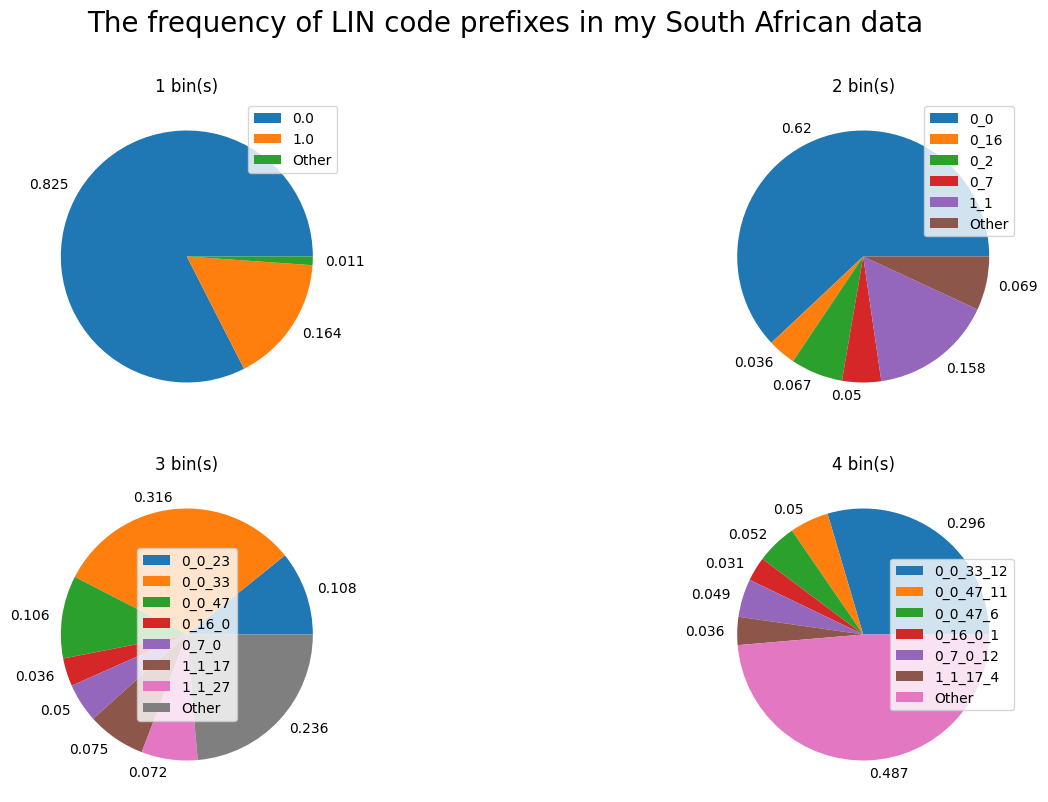

In [136]:
    # creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
ax[0,0].pie(my_lin_prop1_final, labels = my_lin_prop1_final)
ax[0,0].set_title("1 bin(s)")
ax[0,0].legend(my_lin_prop1_final.keys().tolist(), loc = "upper right")

    # ...prefixes with 2 bin(s)
ax[0,1].pie(my_lin_prop2_final, labels = my_lin_prop2_final)
ax[0,1].set_title("2 bin(s)")
ax[0,1].legend(my_lin_prop2_final.keys().tolist(), loc = "upper right")

    # ...prefixes with 3 bin(s)
ax[1,0].pie(my_lin_prop3_final, labels = my_lin_prop3_final)
ax[1,0].set_title("3 bin(s)")
ax[1,0].legend(my_lin_prop3_final.keys().tolist(), loc = "center")

    # ...prefixes with 4 bin(s)
ax[1,1].pie(my_lin_prop4_final, labels = my_lin_prop4_final)
ax[1,1].set_title("4 bin(s)")
ax[1,1].legend(my_lin_prop4_final.keys().tolist(), loc = "right")

fig.suptitle("The frequency of LIN code prefixes in my South African data", fontsize = 20)

plt.show()

I have created a figure with 4 subplots. Each is a pie chart showing the proportion of LIN code prefixes (at a certain number of bins) in my South African dataset.

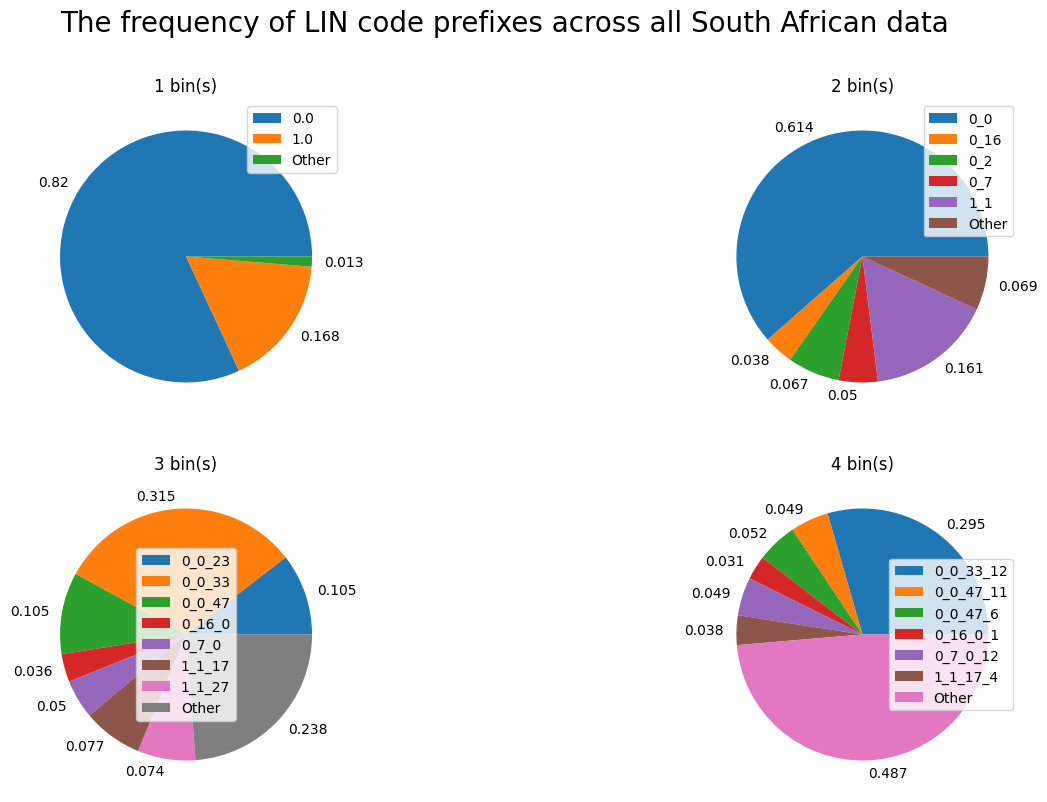

In [139]:
    # conducting the same operations for cgMLST/LIN code data for all of South Africa, including my data

    # Importing...
sa_lin: pd.DataFrame = pd.read_csv("Data/sa_cgmlst_lin.csv", sep = ",", header = "infer")
#sa_lin


    # Changing column names...
sa_lin.rename(columns = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, inplace = True)
    # Dropping columns...
sa_lin.drop(sa_lin.columns[7:15], axis = 1, inplace = True)


    # Marking NA/missing data...
sa_lin.replace(to_replace =["_", "__", "___"], value = np.nan, inplace = True)
    
    
    # Changing variable type...
sa_lin.LIN1 = sa_lin.LIN1.astype(str)
sa_lin.LIN2 = sa_lin.LIN2.astype(str)
sa_lin.LIN3 = sa_lin.LIN3.astype(str)
sa_lin.LIN4 = sa_lin.LIN4.astype(str)
#sa_lin


    # Parsing out entries with missing data...
sa_lin_missing = sa_lin[sa_lin["cgst"].isnull()]
#sa_lin_missing
    # Counting the number of entries with missing data...
sa_lin_missing_count: pd.DataFrame = sa_lin.isnull().sum()
#sa_lin_missing_count

    # Identifying entries with data...
sa_lin_clean: pd.DataFrame = sa_lin.dropna(axis = 0, how = "any")
#sa_lin_clean


    # Counting the frequency of prefixes, 1 bin(s)...
sa_lin_count1: pd.Series = sa_lin_clean.groupby("LIN1").LIN1.count()
#sa_lin_count1
    # Converting to proportion...
sa_lin_prop1: pd.Series = sa_lin_count1 / sa_lin_count1.sum()

    # Parsing out infrequent prefixes...
sa_lin_small1: pd.Series = sa_lin_prop1[sa_lin_prop1 <= 0.03]
    # Identifying frequent prefixes...
sa_lin_prop1_final: pd.Series = sa_lin_prop1[sa_lin_prop1 > 0.03]

    # Grouping the low frequency prefixes...
sa_lin_prop1_final["Other"] = sa_lin_small1.sum()
    # Rounding...
sa_lin_prop1_final = round(sa_lin_prop1_final, 3)


    #...same process for LIN code prefixes of 2 bin(s)
sa_lin_count2: pd.Series = sa_lin_clean.groupby("LIN2").LIN2.count()
#sa_lin_count2
sa_lin_prop2: pd.Series = sa_lin_count2 / sa_lin_count2.sum()

sa_lin_small2: pd.Series = sa_lin_prop2[sa_lin_prop2 <= 0.03]
sa_lin_prop2_final: pd.Series = sa_lin_prop2[sa_lin_prop2 > 0.03]

sa_lin_prop2_final["Other"] = sa_lin_small2.sum()
sa_lin_prop2_final = round(sa_lin_prop2_final, 3)


    #...same process for LIN code prefixes of 3 bin(s)
sa_lin_count3: pd.Series = sa_lin_clean.groupby("LIN3").LIN3.count()
#sa_lin_count3
sa_lin_prop3: pd.Series = sa_lin_count3 / sa_lin_count3.sum()

sa_lin_small3: pd.Series = sa_lin_prop3[sa_lin_prop3 <= 0.03]
sa_lin_prop3_final: pd.Series = sa_lin_prop3[sa_lin_prop3 > 0.03]

sa_lin_prop3_final["Other"] = sa_lin_small3.sum()
sa_lin_prop3_final = round(sa_lin_prop3_final, 3)


    #...same process for LIN code prefixes of 4 bin(s)
sa_lin_count4: pd.Series = sa_lin_clean.groupby("LIN4").LIN4.count()
#sa_lin_count4
sa_lin_prop4: pd.Series = sa_lin_count4 / sa_lin_count4.sum()

sa_lin_small4: pd.Series = sa_lin_prop4[sa_lin_prop4 <= 0.03]
sa_lin_prop4_final: pd.Series = sa_lin_prop4[sa_lin_prop4 > 0.03]

sa_lin_prop4_final["Other"] = sa_lin_small4.sum()
sa_lin_prop4_final = round(sa_lin_prop4_final, 3)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart for prefixes with 1 bin(s)...
ax[0,0].pie(sa_lin_prop1_final, labels = sa_lin_prop1_final)
ax[0,0].set_title("1 bin(s)")
ax[0,0].legend(sa_lin_prop1_final.keys().tolist(), loc = "upper right")

    # ...prefixes with 2 bin(s)
ax[0,1].pie(sa_lin_prop2_final, labels = sa_lin_prop2_final)
ax[0,1].set_title("2 bin(s)")
ax[0,1].legend(sa_lin_prop2_final.keys().tolist(), loc = "upper right")

    # ...prefixes with 3 bin(s)
ax[1,0].pie(sa_lin_prop3_final, labels = sa_lin_prop3_final)
ax[1,0].set_title("3 bin(s)")
ax[1,0].legend(sa_lin_prop3_final.keys().tolist(), loc = "center")

    # ...prefixes with 4 bin(s)
ax[1,1].pie(sa_lin_prop4_final, labels = sa_lin_prop4_final)
ax[1,1].set_title("4 bin(s)")
ax[1,1].legend(sa_lin_prop4_final.keys().tolist(), loc = "right")

fig.suptitle("The frequency of LIN code prefixes across all South African data", fontsize = 20)

plt.show()

This figure represents the same type of information as the previous figure, but for isolates collected across the whole of South Africa.

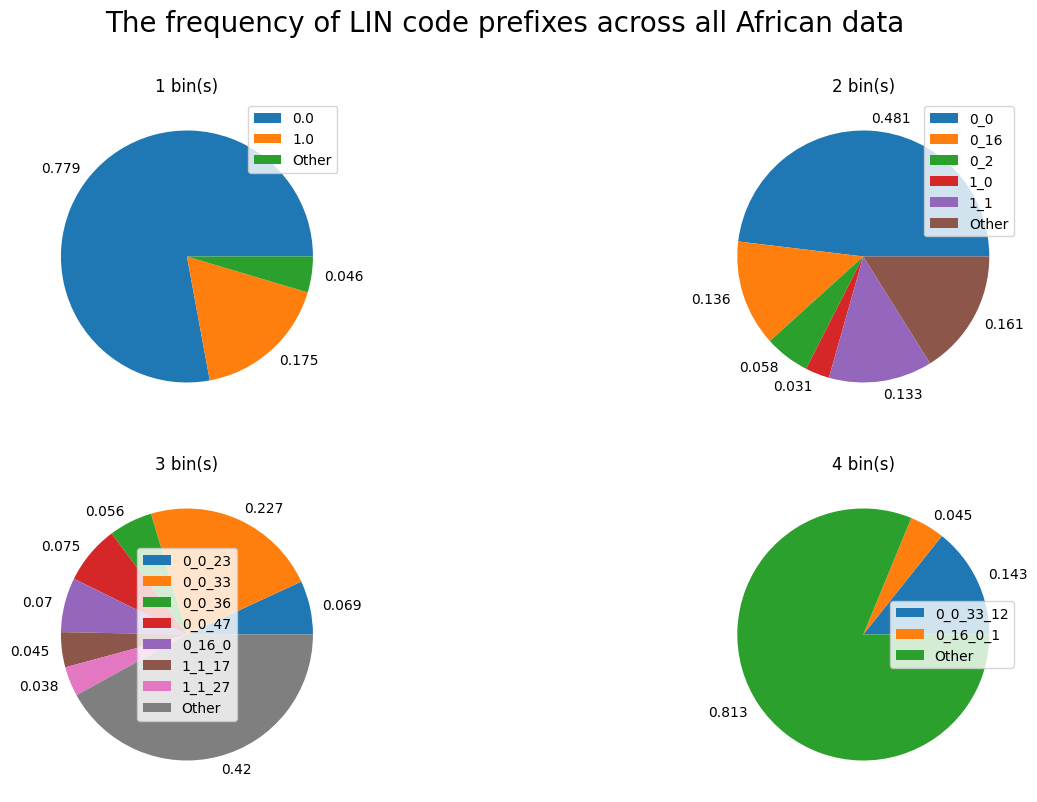

In [140]:
    # conducting the same operations for cgMLST/LIN code data for the whole of Africa, including my data

    # Importing...
afr_lin: pd.DataFrame = pd.read_csv("Data/afr_cgmlst_lin.csv", sep = ",", header = "infer")
#afr_lin


    # Changing column names...
afr_lin.rename(columns = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, inplace = True)
    # Dropping columns...
afr_lin.drop(afr_lin.columns[6:15], axis = 1, inplace = True)


    # Marking NA/missing data...
afr_lin.replace(to_replace =["_", "__", "___"], value = np.nan, inplace = True)
    
    
    # Changing variable type...
afr_lin.LIN1 = afr_lin.LIN1.astype(str)
afr_lin.LIN2 = afr_lin.LIN2.astype(str)
afr_lin.LIN3 = afr_lin.LIN3.astype(str)
afr_lin.LIN4 = afr_lin.LIN4.astype(str)
#afr_lin


    # Parsing out entries with missing data...
afr_lin_missing = afr_lin[afr_lin["cgst"].isnull()]
#afr_lin_missing
    # Counting the number of entries with missing data...
afr_lin_missing_count: pd.DataFrame = afr_lin.isnull().sum()
#afr_lin_missing_count

    # Identifying entries with data...
afr_lin_clean: pd.DataFrame = afr_lin.dropna(axis = 0, how = "any")
#afr_lin_clean


    # Counting the frequency of prefixes, 1 bin(s)...
afr_lin_count1: pd.Series = afr_lin_clean.groupby("LIN1").LIN1.count()
#afr_lin_count1
    # Converting to proportion...
afr_lin_prop1: pd.Series = afr_lin_count1 / afr_lin_count1.sum()

    # Parsing out infrequent prefixes...
afr_lin_small1: pd.Series = afr_lin_prop1[afr_lin_prop1 <= 0.03]
    # Identifying frequent prefixes...
afr_lin_prop1_final: pd.Series = afr_lin_prop1[afr_lin_prop1 > 0.03]

    # Grouping the low frequency prefixes...
afr_lin_prop1_final["Other"] = afr_lin_small1.sum()
    # Rounding...
afr_lin_prop1_final = round(afr_lin_prop1_final, 3)


    #...same process for LIN code prefixes of 2 bin(s)
afr_lin_count2: pd.Series = afr_lin_clean.groupby("LIN2").LIN2.count()
#afr_lin_count2
afr_lin_prop2: pd.Series = afr_lin_count2 / afr_lin_count2.sum()

afr_lin_small2: pd.Series = afr_lin_prop2[afr_lin_prop2 <= 0.03]
afr_lin_prop2_final: pd.Series = afr_lin_prop2[afr_lin_prop2 > 0.03]

afr_lin_prop2_final["Other"] = afr_lin_small2.sum()
afr_lin_prop2_final = round(afr_lin_prop2_final, 3)


    #...same process for LIN code prefixes of 3 bin(s)
afr_lin_count3: pd.Series = afr_lin_clean.groupby("LIN3").LIN3.count()
#afr_lin_count3
afr_lin_prop3: pd.Series = afr_lin_count3 / afr_lin_count3.sum()

afr_lin_small3: pd.Series = afr_lin_prop3[afr_lin_prop3 <= 0.03]
afr_lin_prop3_final: pd.Series = afr_lin_prop3[afr_lin_prop3 > 0.03]

afr_lin_prop3_final["Other"] = afr_lin_small3.sum()
afr_lin_prop3_final = round(afr_lin_prop3_final, 3)


    #...same process for LIN code prefixes of 4 bin(s)
afr_lin_count4: pd.Series = afr_lin_clean.groupby("LIN4").LIN4.count()
#afr_lin_count4
afr_lin_prop4: pd.Series = afr_lin_count4 / afr_lin_count4.sum()

afr_lin_small4: pd.Series = afr_lin_prop4[afr_lin_prop4 <= 0.03]
afr_lin_prop4_final: pd.Series = afr_lin_prop4[afr_lin_prop4 > 0.03]

afr_lin_prop4_final["Other"] = afr_lin_small4.sum()
afr_lin_prop4_final = round(afr_lin_prop4_final, 3)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart for prefixes with 1 bin(s)...
ax[0,0].pie(afr_lin_prop1_final, labels = afr_lin_prop1_final)
ax[0,0].set_title("1 bin(s)")
ax[0,0].legend(afr_lin_prop1_final.keys().tolist(), loc = "upper right")

    # ...prefixes with 2 bin(s)
ax[0,1].pie(afr_lin_prop2_final, labels = afr_lin_prop2_final)
ax[0,1].set_title("2 bin(s)")
ax[0,1].legend(afr_lin_prop2_final.keys().tolist(), loc = "upper right")

    # ...prefixes with 3 bin(s)
ax[1,0].pie(afr_lin_prop3_final, labels = afr_lin_prop3_final)
ax[1,0].set_title("3 bin(s)")
ax[1,0].legend(afr_lin_prop3_final.keys().tolist(), loc = "center")

    # ...prefixes with 4 bin(s)
ax[1,1].pie(afr_lin_prop4_final, labels = afr_lin_prop4_final)
ax[1,1].set_title("4 bin(s)")
ax[1,1].legend(afr_lin_prop4_final.keys().tolist(), loc = "right")

fig.suptitle("The frequency of LIN code prefixes across all African data", fontsize = 20)

plt.show()

This figure represents the same type of information as the previous two figures, but for isolates collected across the whole of the continent of Africa.

### Genotypic AMR data
#### PenA

In [195]:
    # importing beta-lactamase amr data for my South African sample 
my_betalac_amr: pd.DataFrame = pd.read_csv("Data/my_betalac_amr.csv", sep = ",", header = "infer")
my_betalac_amr.head()

    
    # separating out data for PenA specifically
my_pena: pd.DataFrame =  my_betalac_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs
my_pena = my_pena.dropna(axis = 0, how = "any")
    # simplifying column name(s)
my_pena.rename(columns = {"NEIS1753(PenA)": "pena"}, inplace = True)
    # changing PenA allele id to be categorical variables
my_pena.pena = my_pena.pena.astype(str)
my_pena.head()


    # counting the frequency of each PenA allele in the DataFrame
my_pena_count: pd.Series = my_pena.groupby("pena").pena.count()
my_pena_count
        
    # ordering the frequencies in descending order
my_pena_count = my_pena_count.sort_values(ascending = False)
my_pena_count

    # parsing out the top 5 most frequent allele ids
my_pena_top: pd.Series = my_pena_count[0:5]
my_pena_top
    # parsing out the lower frequency allele ids
my_pena_bot: pd.Series = my_pena_count[5:]
my_pena_bot

    # assigning the values back to the original series, but with low frequency ids squashed into one
my_pena_count = my_pena_top
my_pena_count["other"] = my_pena_bot.sum()
my_pena_count

pena
228.0    229
23.0     141
294.0    130
285.0     96
166.0     53
other     45
Name: pena, dtype: int64

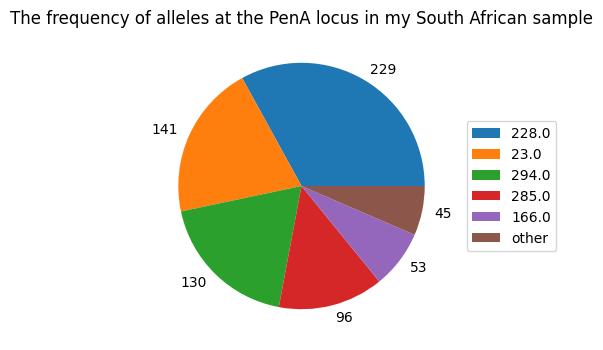

In [214]:
    # creating a figure
fig = plt.figure(figsize = (10,4))

    # plotting a pie chart for allele id frequencies
plt.pie(my_pena_count, labels = my_pena_count)
plt.legend(my_pena_count.keys().tolist(), loc = "right", bbox_to_anchor = (1.35,0.5))
plt.title("The frequency of alleles at the PenA locus in my South African sample")

plt.show()

Here, I have created a pie chart that shows the frequency of different allele ids for the PenA locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L